# Visualize point-cloud as shapes

pip: 

appnope==0.1.3
asttokens==2.4.1
certifi==2023.11.17
charset-normalizer==3.3.2
comm==0.2.1
contourpy==1.2.0
cycler==0.12.1
debugpy==1.8.0
decorator==5.1.1
executing==2.0.1
filelock==3.13.1
fonttools==4.47.2
fsspec==2023.12.2
idna==3.6
ipykernel==6.29.0
ipython==8.20.0
jedi==0.19.1
Jinja2==3.1.3
jupyter_client==8.6.0
jupyter_core==5.7.1
kiwisolver==1.4.5
MarkupSafe==2.1.4
matplotlib==3.8.2
matplotlib-inline==0.1.6
mpmath==1.3.0
nest-asyncio==1.6.0
networkx==3.2.1
numpy==1.26.3
packaging==23.2
parso==0.8.3
pexpect==4.9.0
pillow==10.2.0
platformdirs==4.1.0
pooch==1.8.0
prompt-toolkit==3.0.43
psutil==5.9.8
ptyprocess==0.7.0
pure-eval==0.2.2
Pygments==2.17.2
pyparsing==3.1.1
python-dateutil==2.8.2
pyvista==0.43.2
pyzmq==25.1.2
requests==2.31.0
scooby==0.9.2
six==1.16.0
stack-data==0.6.3
sympy==1.12
torch==2.1.2
tornado==6.4
traitlets==5.14.1
typing_extensions==4.9.0
urllib3==2.1.0
vtk==9.3.0
wcwidth==0.2.13

## Dataset

In [6]:
from datasets.shapenet_data_pc import ShapeNet15kPointClouds
from visuals.visuals_util import visualize_pointcloud_eval, visualize_pointcloud_eval_three, visualize_pointcloud, rotate_point_cloud_x, rotate_point_cloud_y
shapenet_location = "/Users/stephanschmiedmayer/Developer/adl4cv/ShapeNetCore.v2.PC15k"
dataset_10k = ShapeNet15kPointClouds(root_dir=shapenet_location, tr_sample_size=15_360, te_sample_size=15_360)

Total number of data:2832
Min number of points: (train)10000 (test)5000


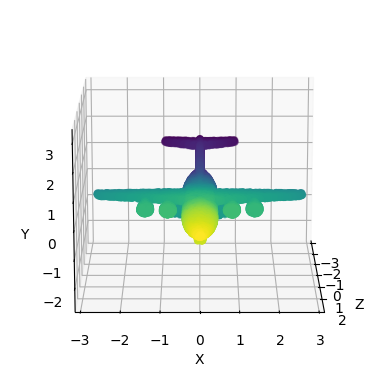

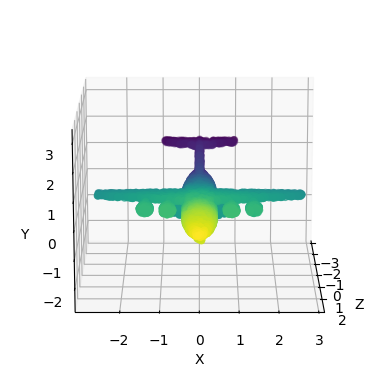

In [7]:
pc_10k = dataset_10k[2]["train_points"]
pc_5k = dataset_10k[2]["test_points"]
_ = visualize_pointcloud(pc_10k)
_ = visualize_pointcloud(pc_5k)

In [8]:
# Save pc_10k as a ply file
import open3d as o3d
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(pc_10k)
o3d.io.write_point_cloud("/Users/stephanschmiedmayer/Desktop/pc_10k.ply", pcd)

True

## Load pointclouds

In [9]:
import numpy as np
from visuals.visuals_util import visualize_pointcloud_eval, visualize_pointcloud_eval_three, visualize_pointcloud, rotate_point_cloud_x, rotate_point_cloud_y

In [10]:
import torch
input_pcs = torch.load("./eval-results/data-for-visualization/pvd-patch-refinement-input-pcs.pth", map_location=torch.device('cpu'))
output_pcs = torch.load("./eval-results/data-for-visualization/pvd-patch-refinement-output-pcs.pth", map_location=torch.device('cpu'))
patch_input_pcs = torch.load("./eval-results/data-for-visualization/pvd-patch-refinement-input-patched-pcs.pth", map_location=torch.device('cpu'))
patch_output_pcs = torch.load("./eval-results/data-for-visualization/pvd-patch-refinement-output-patched-pcs.pth", map_location=torch.device('cpu'))

In [11]:
input_pc = input_pcs[0]
print(input_pc.shape)
output_pc = output_pcs[0]

torch.Size([2048, 3])


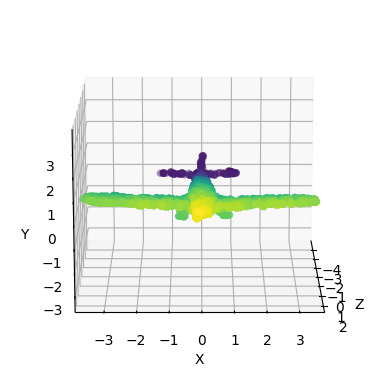

In [12]:
_ = visualize_pointcloud(output_pc)

## PyVista
https://tutorial.pyvista.org/tutorial/02_mesh/solutions/d_create-tri-surface.html

In [10]:
import pyvista as pv

points = input_pc.numpy()
points = rotate_point_cloud_y(points, -90)
points = rotate_point_cloud_x(points, 90)

print(points.shape)

(2048, 3)


/Users/stephanschmiedmayer/Developer/adl4cv/coarse-to-fine-shapes/venv_shapes/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


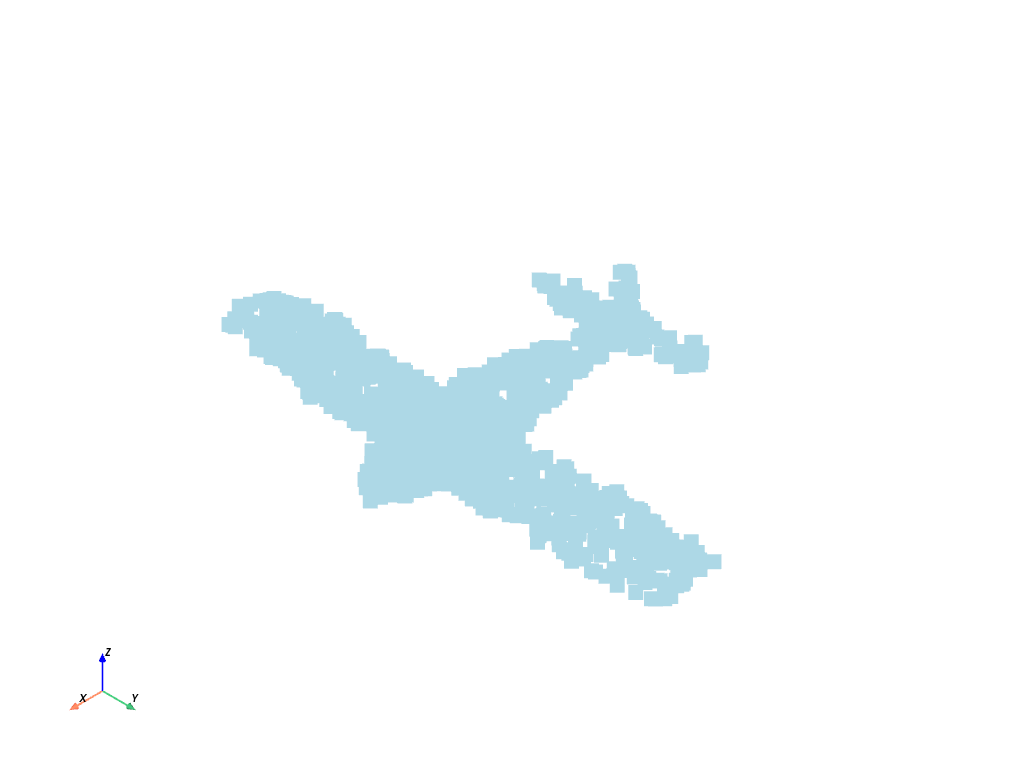

In [11]:
# simply pass the numpy points to the PolyData constructor
cloud = pv.PolyData(points)
cloud.plot(point_size=15)

In [12]:
pv_points = pv.wrap(points)
surf = pv_points.reconstruct_surface()
print(pv_points)
print(surf)

PolyData (0x159a85420)
  N Cells:    2048
  N Points:   2048
  N Strips:   0
  X Bounds:   -3.381e+00, 1.020e+00
  Y Bounds:   -3.607e+00, 3.450e+00
  Z Bounds:   -6.270e-01, 9.889e-01
  N Arrays:   0
PolyData (0x2d995ee60)
  N Cells:    2348
  N Points:   1306
  N Strips:   0
  X Bounds:   -3.962e+00, 1.266e+00
  Y Bounds:   -4.188e+00, 3.655e+00
  Z Bounds:   -1.208e+00, 1.116e+00
  N Arrays:   0


/Users/stephanschmiedmayer/Developer/adl4cv/coarse-to-fine-shapes/venv_shapes/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


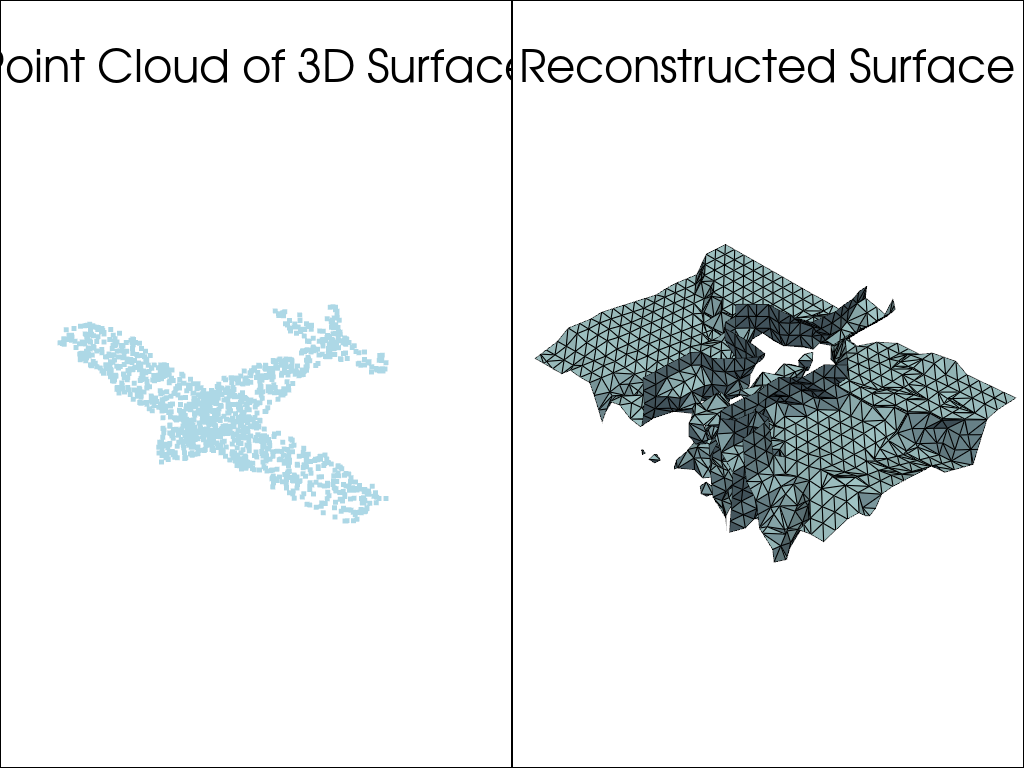

In [13]:
pl = pv.Plotter(shape=(1, 2))
pl.add_mesh(pv_points)
pl.add_title('Point Cloud of 3D Surface')
pl.subplot(0, 1)
pl.add_mesh(surf, color=True, show_edges=True)
pl.add_title('Reconstructed Surface')
pl.show()

/Users/stephanschmiedmayer/Developer/adl4cv/coarse-to-fine-shapes/venv_shapes/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


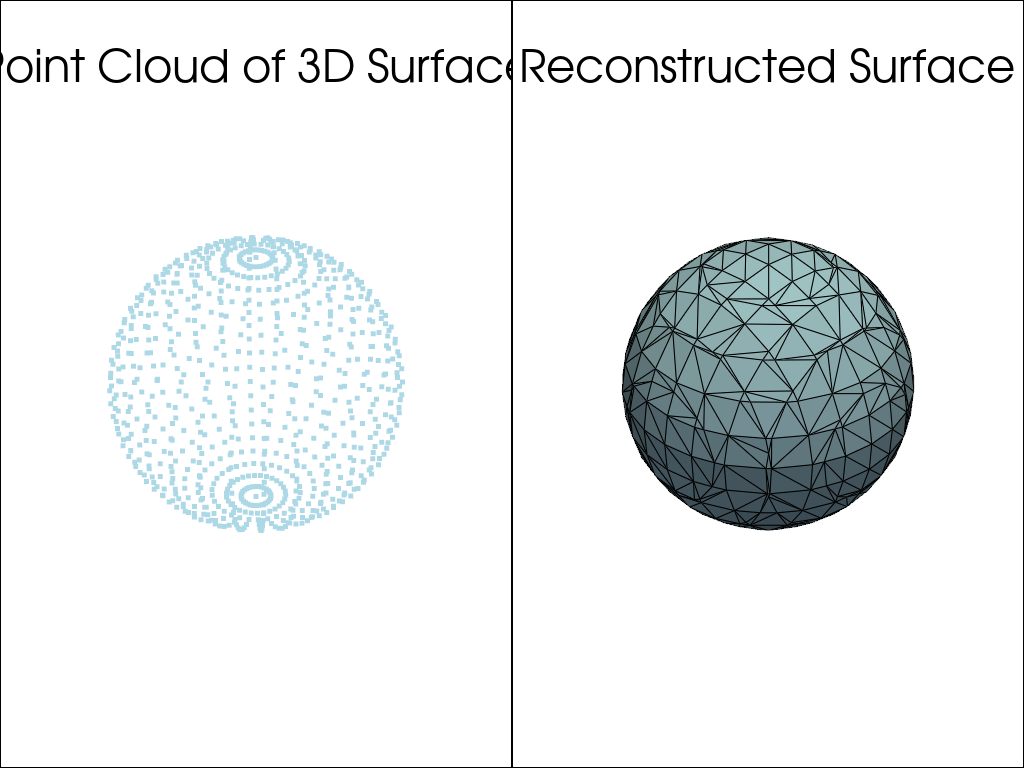

In [14]:
points = pv.wrap(pv.Sphere().points)
surf = points.reconstruct_surface()
surf
pl = pv.Plotter(shape=(1, 2))
pl.add_mesh(points)
pl.add_title('Point Cloud of 3D Surface')
pl.subplot(0, 1)
pl.add_mesh(surf, color=True, show_edges=True)
pl.add_title('Reconstructed Surface')
pl.show()

## Poisson surface reconstruction

In [6]:
import torch
import numpy as np

def save_tensor_to_ply(tensor, filename):
    # Ensure the tensor is on the CPU and convert to numpy
    points = tensor.cpu().numpy()

    # Write to a PLY file
    with open(filename, 'w') as f:
        f.write("ply\n")
        f.write("format ascii 1.0\n")
        f.write("element vertex {}\n".format(len(points)))
        f.write("property float x\n")
        f.write("property float y\n")
        f.write("property float z\n")
        f.write("end_header\n")
        for point in points:
            f.write("{} {} {}\n".format(point[0], point[1], point[2]))

# Example usage
# point_cloud_tensor = torch.tensor([...])  # Your PyTorch tensor here
# save_tensor_to_ply(point_cloud_tensor, "output.ply")

In [5]:
import open3d as o3d
import numpy as np
import torch

def poisson_surface_reconstruction_pytorch(pcd_tensor, depth=9, normal_radius=0.1, normal_max_nn=30):
    # Ensure the tensor is in CPU and convert to numpy
    pcd_np = pcd_tensor.cpu().numpy()

    # Create an Open3D point cloud from the numpy array
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(pcd_np)

    # Estimate normals
    o3d.geometry.PointCloud.estimate_normals(
        pcd,
        search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=normal_radius, max_nn=normal_max_nn)
    )
    o3d.geometry.PointCloud.orient_normals_towards_camera_location(
        pcd,
        camera_location=np.array([0., 0., 0.])
    )

    # Apply Poisson Surface Reconstruction
    mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=depth)

    # Optionally remove low-density vertices
    vertices_to_remove = densities < np.quantile(densities, 0.01)
    mesh.remove_vertices_by_mask(vertices_to_remove)

    return mesh


def save_mesh(mesh, name):
    o3d.io.write_triangle_mesh(f"{name}.ply", mesh)

def visualize_mesh(mesh):
    o3d.visualization.draw_geometries([mesh], window_name="Poisson Surface Reconstruction")
    
# Example usage
# Assuming you have a PyTorch tensor 'point_cloud_tensor' of shape Nx3
# point_cloud_tensor = torch.tensor([...])  # Your Nx3 point cloud data here

In [7]:
mesh = poisson_surface_reconstruction_pytorch(input_pc, depth=15, normal_radius=0.1, normal_max_nn=30)
save_mesh(mesh, "/Users/stephanschmiedmayer/Desktop/mesh")

In [8]:
save_tensor_to_ply(input_pc, "/Users/stephanschmiedmayer/Desktop/pcd.ply")

## Meshlab

In [10]:
import torch
import numpy as np

def export_pointcloud_to_pts(tensor, filename):
    """
    Exports a PyTorch point cloud tensor to a PTS file.
    
    :param tensor: PyTorch tensor of shape (N, 3) representing the point cloud.
    :param filename: Name of the file to save the point cloud to.
    """
    # Ensure the tensor is on CPU and convert to numpy
    numpy_pc = tensor.cpu().numpy()

    # Open file and write points
    with open(filename, 'w') as file:
        for point in numpy_pc:
            file.write(f"{point[0]} {point[1]} {point[2]}\n")

    print(f"Point cloud exported to {filename}")
  
  
def export_pointcloud_to_asc(tensor, filename):
    """
    Exports a PyTorch point cloud tensor to an ASC file.
    
    :param tensor: PyTorch tensor representing the point cloud. Shape should be (N, 3) or (N, 6).
    :param filename: Name of the file to save the point cloud to.
    """
    # Ensure the tensor is on CPU and convert to numpy
    numpy_pc = tensor.cpu().numpy()

    # Open file and write points
    with open(filename, 'w') as file:
        for point in numpy_pc:
            line = ' '.join(map(str, point))
            file.write(f"{line}\n")

    print(f"Point cloud exported to {filename}")

# Example usage:
# point_cloud_tensor = torch.rand(100, 3)  # Example tensor for XYZ only
# export_pointcloud_to_asc(point_cloud_tensor, "output.asc")

In [ ]:
export_pointcloud_to_pts(input_pc, "/Users/stephanschmiedmayer/Desktop/pcd.pts")

In [22]:
export_pointcloud_to_asc(pc_10k, "/Users/stephanschmiedmayer/Desktop/10k.asc")
export_pointcloud_to_asc(pc_5k, "/Users/stephanschmiedmayer/Desktop/5k.asc")

Point cloud exported to /Users/stephanschmiedmayer/Desktop/10k.asc
Point cloud exported to /Users/stephanschmiedmayer/Desktop/5k.asc


## Normal estimation

In [32]:
def save_o3d(pc, name: str):
    o3d.io.write_point_cloud(pc, "/Users/stephanschmiedmayer/Desktop/" + name + ".ply")

In [31]:
import open3d as o3d
import numpy as np

def estimate_normals_pca(point_cloud_np, k_neighbors=30) -> o3d.geometry.PointCloud:
    """
    Estimate normals for a point cloud represented as a NumPy ndarray.
    
    Args:
    - point_cloud_np: NumPy ndarray of shape (N, 3), where each row represents (x, y, z).
    - k_neighbors: Number of neighbors to use for PCA-based normal estimation.
    
    Returns:
    An Open3D point cloud object with normals estimated.
    """
    # Ensure the input is a NumPy ndarray
    if not isinstance(point_cloud_np, np.ndarray) or point_cloud_np.shape[1] != 3:
        raise ValueError("Input must be a NumPy ndarray with shape (N, 3)")

    # Create an Open3D point cloud from the NumPy array
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(point_cloud_np)

    # Estimate normals using PCA
    pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamKNN(knn=k_neighbors))

    # Optionally, orient the normals (uncomment if needed)
    # pcd.orient_normals_towards_camera_location(camera_location=np.array([0, 0, 0]))

    return pcd

normals_pca_10k = estimate_normals_pca(pc_10k.numpy())
save_o3d(normals_pca_10k, "normals_pca_10k")

True

In [33]:
import open3d as o3d
import numpy as np

def apply_mls_and_estimate_normals(point_cloud_np, radius=0.1, max_neighbors=30):
    """
    Apply Moving Least Squares (MLS) for smoothing and normal estimation.
    
    Args:
    - point_cloud_np: NumPy ndarray of shape (N, 3) representing the point cloud.
    - radius: Radius to use for MLS.
    - max_neighbors: Maximum number of neighbors to consider in MLS.
    
    Returns:
    A tuple of Open3D point cloud objects (original, smoothed with normals).
    """
    # Ensure the input is a NumPy ndarray with shape (N, 3)
    if not isinstance(point_cloud_np, np.ndarray) or point_cloud_np.shape[1] != 3:
        raise ValueError("Input must be a NumPy ndarray with shape (N, 3)")

    # Create an Open3D point cloud
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(point_cloud_np)

    # Apply MLS for smoothing and normal estimation
    mls_pcd = pcd.compute_smoothed_point_cloud(radius, max_neighbors)

    return mls_pcd

# Apply MLS and estimate normals
smoothed_pcd_10k = apply_mls_and_estimate_normals(pc_10k.numpy(), radius=0.1, max_neighbors=30)

# Save the smoothed point cloud with normals to a PLY file
save_o3d(smoothed_pcd_10k, "smoothed_pcd_10k")

AttributeError: 'open3d.cpu.pybind.geometry.PointCloud' object has no attribute 'compute_smoothed_point_cloud'

See main.cpp for M

In [3]:
import numpy as np
from plyfile import PlyFile
import matplotlib.pyplot as plt
# Open the PLY file
with PlyFile('/Users/stephanschmiedmayer/Desktop/normals_pcl_10k.ply') as ply:
    # Read the point cloud data into a NumPy array
    point_cloud = np.array(ply.get_vertices())
    # Create a figure and axis object
    fig, ax = plt.subplots()
    # Scatter plot the point cloud
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], c='r')
    # Set the axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    # Show the plot
    plt.show()


ImportError: cannot import name 'PlyFile' from 'plyfile' (/Users/stephanschmiedmayer/Developer/adl4cv/coarse-to-fine-shapes/venv_shapes/lib/python3.11/site-packages/plyfile.py)

## Point2Mesh reimplementation
https://github.com/dcharatan/point2mesh-reimplementation

## Open3d

In [ ]:
import open3d as o3d

In [21]:
point_cloud_np = point_cloud.numpy()
point_cloud_o3d = o3d.geometry.PointCloud()
point_cloud_o3d.points = o3d.utility.Vector3dVector(point_cloud_np)

In [22]:
point_cloud_o3d.estimate_normals(
    search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30)
)
point_cloud_o3d.orient_normals_consistent_tangent_plane(k=30)

In [28]:
radii = [0.05, 0.1, 0.2, 0.4]
radii = [r * 2 for r in radii]
rec_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(
    point_cloud_o3d, o3d.utility.DoubleVector(radii))

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [29]:
o3d.visualization.draw_geometries([rec_mesh])

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


: 